EXCERSICE 5.1

In [27]:
pip install pandas scipy numpy

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [28]:
print(df.head(15))

    Person ID Gender  Age            Occupation  Sleep Duration  \
0           1   Male   27     Software Engineer             6.1   
1           2   Male   28                Doctor             6.2   
2           3   Male   28                Doctor             6.2   
3           4   Male   28  Sales Representative             5.9   
4           5   Male   28  Sales Representative             5.9   
5           6   Male   28     Software Engineer             5.9   
6           7   Male   29               Teacher             6.3   
7           8   Male   29                Doctor             7.8   
8           9   Male   29                Doctor             7.8   
9          10   Male   29                Doctor             7.8   
10         11   Male   29                Doctor             6.1   
11         12   Male   29                Doctor             7.8   
12         13   Male   29                Doctor             6.1   
13         14   Male   29                Doctor             6.

**Descriptive Statistics**:
Descriptive statistics are essential for understanding the basic features of a dataset. They provide simple summaries about the sample and the measures, forming the basis of virtually every quantitative analysis of data. Descriptive statistics help to simplify large amounts of data in a sensible way.

In [7]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])
print("\nStandard Deviation:\n", df.std(numeric_only=True))
print("\nVariance:\n", df.var(numeric_only=True))


Mean:
 Person ID                   187.500000
Age                          42.184492
Sleep Duration                7.132086
Quality of Sleep              7.312834
Physical Activity Level      59.171123
Stress Level                  5.385027
Heart Rate                   70.165775
Daily Steps                6816.844920
dtype: float64

Median:
 Person ID                   187.5
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              7.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   70.0
Daily Steps                7000.0
dtype: float64

Mode:
 Person ID                     1.0
Age                          43.0
Sleep Duration                7.2
Quality of Sleep              8.0
Physical Activity Level      60.0
Stress Level                  3.0
Heart Rate                   68.0
Daily Steps                8000.0
Name: 0, dtype: float64

Standard Deviation:
 Person ID                   108.108742
Age 

In [9]:
print("\nRange:\n", df.max(numeric_only=True) - df.min(numeric_only=True))

# Print skewness for numeric columns only
print("\nSkewness:\n", df.skew(numeric_only=True))

# Print kurtosis for numeric columns only
print("\nKurtosis:\n", df.kurt(numeric_only=True))
from scipy import stats




Range:
 Person ID                   373.0
Age                          32.0
Sleep Duration                2.7
Quality of Sleep              5.0
Physical Activity Level      60.0
Stress Level                  5.0
Heart Rate                   21.0
Daily Steps                7000.0
dtype: float64

Skewness:
 Person ID                  0.000000
Age                        0.257222
Sleep Duration             0.037554
Quality of Sleep          -0.207448
Physical Activity Level    0.074487
Stress Level               0.154330
Heart Rate                 1.224824
Daily Steps                0.178277
dtype: float64

Kurtosis:
 Person ID                 -1.200000
Age                       -0.909780
Sleep Duration            -1.286506
Quality of Sleep          -0.748276
Physical Activity Level   -1.266068
Stress Level              -1.327307
Heart Rate                 2.286455
Daily Steps               -0.394031
dtype: float64


**Inferential Statistic**s:
Inferential statistics allow us to make predictions or inferences about a population based on a sample of data. Unlike descriptive statistics, which simply summarize data, inferential statistics help us draw conclusions and make predictions beyond the immediate data.

In [13]:
from scipy import stats


sleep = df['Sleep Duration'] #Removed trailing whitespace from column name

# Hypothetical population mean for BMI
population_mean = 1.00

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sleep, population_mean)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 149.04529330234453
P-Value: 0.0


In [15]:

Hrate = df['Heart Rate'] #Removed trailing whitespace from column name

# Hypothetical population mean for BMI
population_mean = 1.00

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(Hrate, population_mean)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 323.4302171731714
P-Value: 0.0


**Confidence Intervals**:
A confidence interval is a range of values, derived from the sample data, that is likely to contain the true population parameter. Confidence intervals provide an estimate of the uncertainty associated with a sample statistic, allowing researchers to gauge the precision of their estimates.

In [19]:
import numpy as np
from scipy import stats

sample_mean = np.mean(sleep) # Changed Sleep_Duration to sleep
standard_error = stats.sem(sleep) # Changed Sleep_Duration to sleep

# Compute 95% confidence interval for BMI
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print(f"95% Confidence Interval for sleep: {confidence_interval}")

95% Confidence Interval for sleep: (7.051447880263927, 7.212723242730723)


**Regression Analysis**:
Regression analysis is used to model the relationship between dependent and independent variables. It helps in understanding how the typical value of the dependent variable changes when any one of the independent variables is varied. Regression analysis is fundamental in predicting outcomes and identifying trends in data

In [21]:
import statsmodels.api as sm

# Define independent variable (add constant for intercept)
X = sm.add_constant(df['Sleep Duration']) # Removed trailing whitespace from column name

# Define dependent variable
y = df['Heart Rate']

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Heart Rate   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           6.91e-27
Time:                        15:52:26   Log-Likelihood:                -1003.1
No. Observations:                 374   AIC:                             2010.
Df Residuals:                     372   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             89.3114      1.656     53.

EXCERSICE 5.2

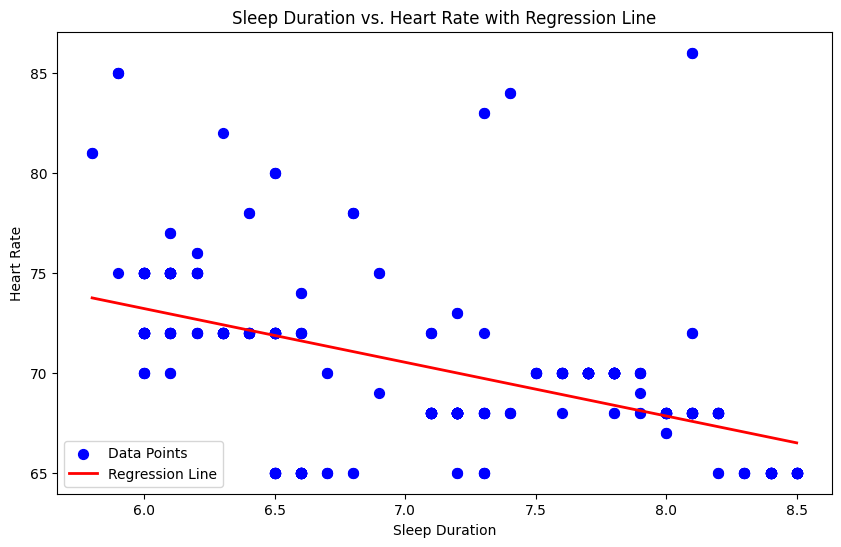

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep Duration'], df['Heart Rate'], color='blue', s=50, label='Data Points')

# Fit a linear regression model using NumPy
# X and Y values
X = df['Sleep Duration'].values
y = df['Heart Rate'].values

# Add a constant to the model (intercept)
X_with_const = np.vstack([np.ones_like(X), X]).T

# Calculate the coefficients using the Ordinary Least Squares (OLS) method
coefficients = np.linalg.lstsq(X_with_const, y, rcond=None)[0]
intercept, slope = coefficients

# Generate regression line values
X_range = np.linspace(X.min(), X.max(), 100)
y_pred = intercept + slope * X_range

# Plot regression line
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.title('Sleep Duration vs. Heart Rate with Regression Line')
plt.legend()

# Show plot
plt.show()


-BIPIN